# Construindo um modelo de regressão linear com TensorFlow

In [0]:
# Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Definindo os hyperparâmetros do modelo

In [0]:
# Hyperparâmetros do modelo
learning_rate = 0.01
training_epochs = 2000
display_step = 200

## Definindo os datasets de treino e de teste
#### Considere x como o tamanho de uma casa e y o preço de uma casa

In [0]:
# Dataset de treino
train_x = np.asarray([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167, 7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1])
train_y = np.asarray([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221, 2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3])
n_samples = train_x.shape[0]

# Dataset de teste
test_x = np.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
test_y = np.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

## Placeholders e variáveis

In [0]:
# Placeholders para as variáveis preditoras (x) e para variável target (y)
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

# Pesos e bias do modelo
w = tf.Variable(np.random.randn(), name = "wight")
b = tf.Variable(np.random.randn(), name = "bias")

## Construindo o modelo

In [0]:
# Construíndo o modelo linear
# Fórmula do modelo linear: y = w*x + b
linear_model = w*x + b

# Mean squared error (erro quadrado médio)
cost = tf.reduce_sum(tf.square(linear_model - y)) / (2 * n_samples)

# Otimização com Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

## Executando o grafo computacional, treinando e testando o modelo

Epoch:   200 	 Cost:   0.07783 	 w:0.2346 	 b:0.9192
Epoch:   400 	 Cost:   0.07748 	 w:0.2383 	 b:0.8932
Epoch:   600 	 Cost:   0.07727 	 w:0.2412 	 b:0.8729
Epoch:   800 	 Cost:   0.07714 	 w:0.2434 	 b:0.8569
Epoch:  1000 	 Cost:   0.07706 	 w:0.2452 	 b:0.8444
Epoch:  1200 	 Cost:   0.07701 	 w:0.2466 	 b:0.8345
Epoch:  1400 	 Cost:   0.07698 	 w:0.2477 	 b:0.8268
Epoch:  1600 	 Cost:   0.07696 	 w:0.2485 	 b:0.8208
Epoch:  1800 	 Cost:   0.07695 	 w:0.2492 	 b: 0.816
Epoch:  2000 	 Cost:   0.07694 	 w:0.2497 	 b:0.8123

Otimização Concluída!
Custo Final de Treinamento: 0.07694017  - w Final: 0.24972683  - b Final: 0.8123289 



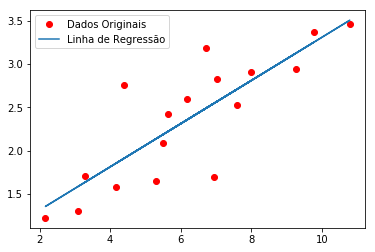

Custo Final em Teste: 0.078687765
Diferença Média Quadrada Absoluta: 0.0017475933


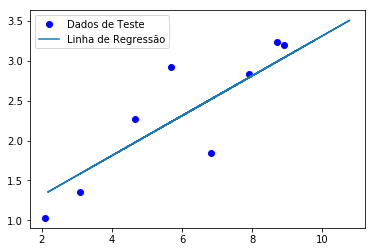

In [6]:
# Definindo a inicialização das variáveis
init = tf.global_variables_initializer()

# Iniciando a sessão
with tf.Session() as sess:
  # Iniciando as variáveis
  sess.run(init)
  
  # Treinamento do modelo
  for epoch in range(training_epochs):
    
    # Otimização com Gradient Descent
    sess.run(optimizer, feed_dict = {x: train_x, y: train_y})
    
    # Display de cada epoch
    if (epoch+1) % display_step == 0:
      c = sess.run(cost, feed_dict = {x: train_x, y: train_y})
      print("Epoch:{0:6} \t Cost:{1:10.4} \t w:{2:6.4} \t b:{3:6.4}".format(epoch+1, c, sess.run(w), sess.run(b)))
  
  # Imprimindo os parâmetros finais do modelo
  print("\nOtimização Concluída!")
  training_cost = sess.run(cost, feed_dict = {x: train_x, y: train_y})
  print("Custo Final de Treinamento:", training_cost, " - w Final:", sess.run(w), " - b Final:", sess.run(b), "\n")
  
  # Visualizando o resultado
  plt.plot(train_x, train_y, "ro", label = "Dados Originais")
  plt.plot(train_x, sess.run(w) * train_x + sess.run(b), label = "Linha de Regressão")
  plt.legend()
  plt.show()
  
  # Testando o modelo
  testing_cost = sess.run(tf.reduce_sum(tf.square(linear_model - y)) / (2 * test_x.shape[0]), 
                            feed_dict={x: test_x, y: test_y})
  
  print("Custo Final em Teste:", testing_cost)
  print("Diferença Média Quadrada Absoluta:", abs(training_cost - testing_cost))
  
  # Display em Teste
  plt.plot(test_x, test_y, "bo", label = "Dados de Teste")
  plt.plot(train_x, sess.run(w) * train_x + sess.run(b), label = "Linha de Regressão")
  plt.legend()
  plt.show()

# Fechando a sessão
sess.close()